In [1]:
import os 
import pathlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import classification_report,confusion_matrix
     

In [2]:
for dirpath,dirnames,filenames in os.walk("C:/Users/pc/Project/COVID_IEEE"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


there are 2 directories and 0 images in 'C:/Users/pc/Project/COVID_IEEE'.
there are 0 directories and 536 images in 'C:/Users/pc/Project/COVID_IEEE\covid'.
there are 0 directories and 668 images in 'C:/Users/pc/Project/COVID_IEEE\normal'.


In [3]:
data_dir = pathlib.Path("C:/Users/pc/Project/COVID_IEEE")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['covid', 'normal'], dtype='<U6')

In [4]:
def view_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img, cmap ="gray")
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")
    
    return img

['case48_Xray_1.jpeg']
image shape (817, 1068, 3)


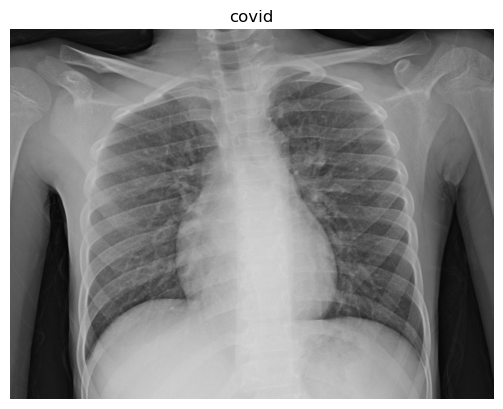

In [5]:
img = view_image("C:/Users/pc/Project/COVID_IEEE/","covid")

['NORMAL2-IM-0776-0001.jpeg']
image shape (1769, 1744)


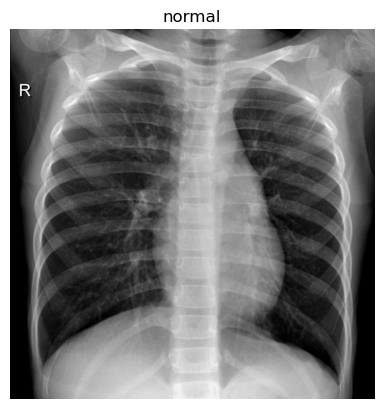

In [6]:
img = view_image("C:/Users/pc/Project/COVID_IEEE/","normal")

In [7]:
data=[]
labels=[]
covid=os.listdir("C:/Users/pc/Project/COVID_IEEE/covid/")
for a in covid:

    image = cv2.imread("C:/Users/pc/Project/COVID_IEEE/covid/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

In [8]:
normal=os.listdir("C:/Users/pc/Project/COVID_IEEE/normal/")
for a in normal:

    image = cv2.imread("C:/Users/pc/Project/COVID_IEEE/normal/"+a,)
    image = cv2.resize(image, (224, 224))



    data.append(image)
    labels.append(1)

In [9]:
data = np.array(data) / 255.0
img_labels = np.array(labels)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, img_labels, test_size=0.20, random_state=15)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [11]:
epochs=12

In [12]:
model = Sequential()

#Block Number 1
model.add(Conv2D(input_shape = (224,224,3), filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 2
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))


model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 3
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))

# Fully Connected layer
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))

model.add(Dense(units=256, activation="relu"))


model.add(Dense(units=2, activation="sigmoid"))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
     


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                        

In [14]:
history=model.fit(X_train, y_train, validation_split=0.3, epochs=12, batch_size=32)

Epoch 1/12
22/22 [==============================] - 113s 5s/step - loss: 0.7590 - accuracy: 0.6588 - val_loss: 0.4611 - val_accuracy: 0.8131
Epoch 2/12
22/22 [==============================] - 107s 5s/step - loss: 0.2993 - accuracy: 0.9006 - val_loss: 0.1953 - val_accuracy: 0.9100
Epoch 3/12
22/22 [==============================] - 105s 5s/step - loss: 0.1116 - accuracy: 0.9555 - val_loss: 0.2551 - val_accuracy: 0.9170
Epoch 4/12
22/22 [==============================] - 105s 5s/step - loss: 0.1238 - accuracy: 0.9466 - val_loss: 0.1306 - val_accuracy: 0.9654
Epoch 5/12
22/22 [==============================] - 107s 5s/step - loss: 0.0625 - accuracy: 0.9748 - val_loss: 0.1672 - val_accuracy: 0.9585
Epoch 6/12
22/22 [==============================] - 100s 5s/step - loss: 0.0488 - accuracy: 0.9866 - val_loss: 0.0987 - val_accuracy: 0.9654
Epoch 7/12
22/22 [==============================] - 106s 5s/step - loss: 0.0324 - accuracy: 0.9911 - val_loss: 0.1313 - val_accuracy: 0.9619
Epoch 8/12
22

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

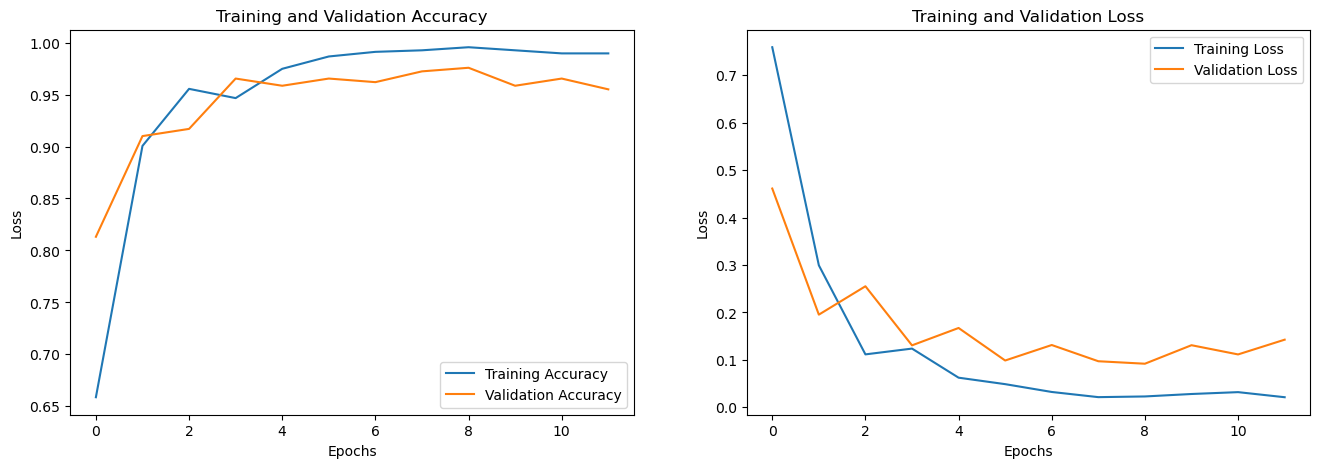

In [16]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
y_pred=model.predict(X_test)

8/8 [==============================] - 8s 648ms/step


In [18]:
Y_pred=[]
for i in y_pred:
    if i[0]>i[1]:
        Y_pred.append(0)
    else:
        Y_pred.append(1)
    
   

In [19]:
Y_test=[]
for i in y_test:
    if i[0]>i[1]:
        Y_test.append(0)
    else:
        Y_test.append(1)

In [20]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       100
           1       0.97      0.99      0.98       141

    accuracy                           0.98       241
   macro avg       0.98      0.97      0.97       241
weighted avg       0.98      0.98      0.98       241



Text(95.72222222222221, 0.5, 'Truth')

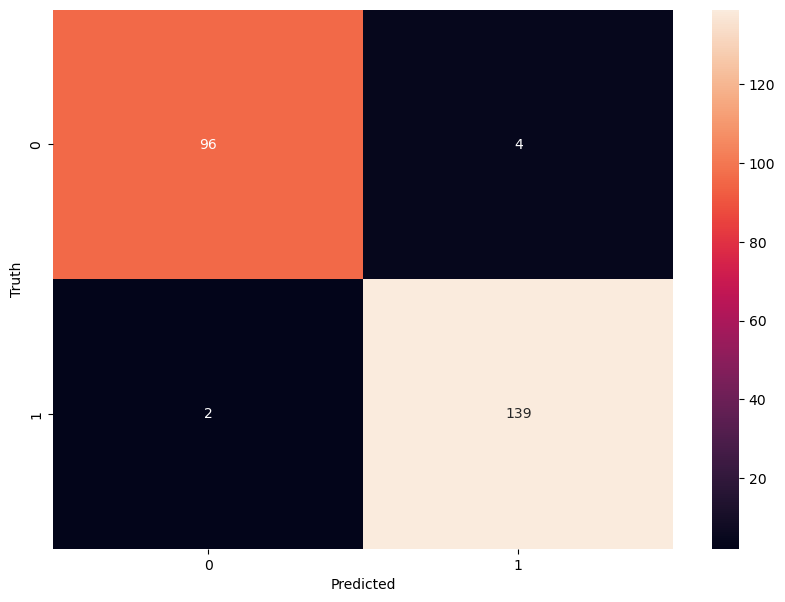

In [21]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
tp = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tn = cm[1][1]

In [23]:
sensitivity=(tp/(tp+fn))
print("The sensitivity is","{:.2f}".format(sensitivity*100),"%")

The sensitivity is 97.96 %


In [24]:
specificity=(tn/(tn+fp))
print("The specificity is","{:.2f}".format(specificity*100),"%")

The specificity is 97.20 %


In [25]:
model.save("covid_test.h5")

In [26]:
new_model=tf.keras.models.load_model("covid_test.h5")

Image to predict


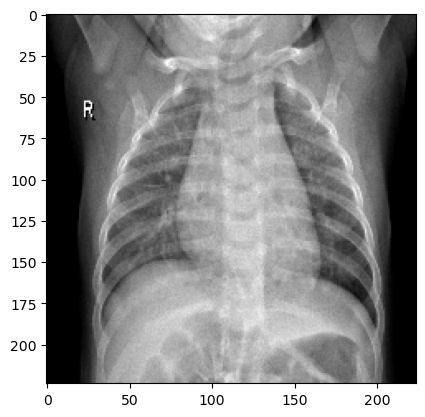

In [27]:
from tensorflow.keras.preprocessing import image
img_pred=image.load_img(r"C:/Users/pc/Project/Test/normal/IM-0311-0001.jpeg",target_size=(224,224))
print("Image to predict")
plt.imshow(img_pred)

In [28]:
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)

result=new_model.predict(img_pred)
result=result.ravel()
#print(result)
if result[0]>0.5:
    print("Covid Positive")
else:
    print("Covid Negative")

1/1 [==============================] - 1s 619ms/step
Covid Negative
